In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import datetime as dt
#settings
params = {'legend.fontsize': 9,
          'figure.figsize': (15, 5),
         'axes.labelsize': 10,
         'axes.titlesize':11,
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'axes.grid': True,
         'axes.grid.which': 'both',	
         'grid.linestyle': '--',
         'grid.color': 'silver',
         'grid.alpha': 0.5,
         'lines.linewidth': 1,         
         'lines.markersize': 4
         
         }

plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 150
blue = '#005AB5'
red = '#DC3220' 

In [2]:
data = { "Model" : ["SARIMA", "SARIMA" , "LSTM", "LSTM", "CE_LSTM", "CE_LSTM"],
        "ID" : ["Train", "Test", "Train", "Test", "Train", "Test"],
        "MAPE" : [3.64, 9.10, 6.03, 5.49, 4.57, 5.72],
        "RMSE" : [58.69, 125.07, 57.33, 65.74, 45.92, 74.98]
        }
data = pd.DataFrame(data)
data

,Model,ID,MAPE,RMSE
0,SARIMA,Train,3.64,58.69
1,SARIMA,Test,9.10,125.07
2,LSTM,Train,6.03,57.33
3,LSTM,Test,5.49,65.74
4,CE_LSTM,Train,4.57,45.92
5,CE_LSTM,Test,5.72,74.98


In [3]:
MAPE_mean = data.groupby("Model").agg({"MAPE": "mean"})
RMSE_mean = data.groupby("Model").agg({"RMSE": "mean"})

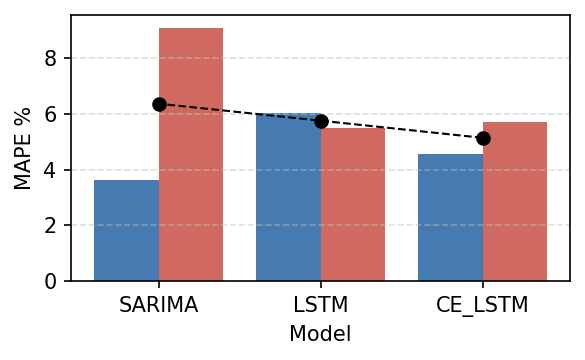

In [7]:
plt.figure(figsize=(4,2.5))

sns.barplot(data=data, x="Model", y="MAPE", hue="ID", palette=[blue, red], alpha=0.8,legend=False)
plt.plot(MAPE_mean.MAPE, marker='o', linestyle='--', markersize=6, color='black')

plt.ylabel("MAPE %")



plt.tight_layout()


plt.savefig('../Figures/Presentation/final_MAPE.svg')
plt.show()

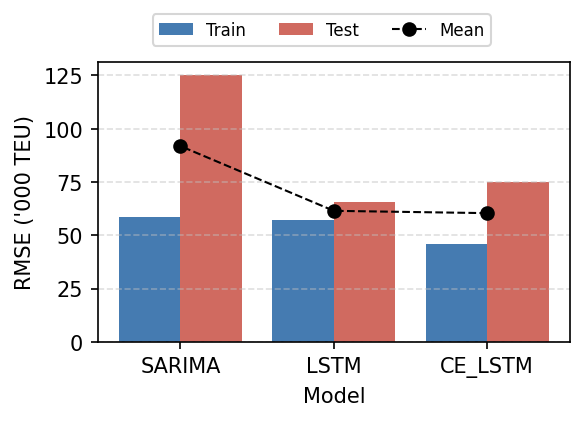

In [13]:
plt.figure(figsize=(4,3))

sns.barplot(data=data, x="Model", y="RMSE", hue="ID", palette=[blue, red], alpha=0.8)
plt.plot(RMSE_mean.RMSE, marker='o', linestyle='--', markersize=6, color='black', label='Mean')

plt.ylabel("RMSE ('000 TEU)")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    # title="Anos de Referência",
    title_fontsize=7,
    fontsize=8,
    ncols=4,
    loc="upper right",
    bbox_to_anchor=(0.85, 1.2)
)
plt.tight_layout()
plt.savefig('../Figures/Presentation/final_RMSE.svg')
plt.show()